In [15]:
import  numpy as np 
import  pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression


In [16]:
df = pd.read_csv("data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [17]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [19]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [20]:
#make all columns lower and replace any space with underscore (_) 
for i in df.columns :
    if df[i].dtype=='object':
        df[i]= df[i].str.lower()
        df[i] = df[i].str.replace(" " , "_")

In [21]:
''' this columns contains many null values ... if we drop it we will lose more data .. 
so the best solution is drop this columns 
'''
df = df.drop("market_category",axis = 1)

In [23]:
# drop null values 
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11812 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11812 non-null  object 
 1   model              11812 non-null  object 
 2   year               11812 non-null  int64  
 3   engine_fuel_type   11812 non-null  object 
 4   engine_hp          11812 non-null  float64
 5   engine_cylinders   11812 non-null  float64
 6   transmission_type  11812 non-null  object 
 7   driven_wheels      11812 non-null  object 
 8   number_of_doors    11812 non-null  float64
 9   vehicle_size       11812 non-null  object 
 10  vehicle_style      11812 non-null  object 
 11  highway_mpg        11812 non-null  int64  
 12  city_mpg           11812 non-null  int64  
 13  popularity         11812 non-null  int64  
 14  msrp               11812 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


C:\Users\Skytop\AppData\Local\Temp\ipykernel_5308\1426671555.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

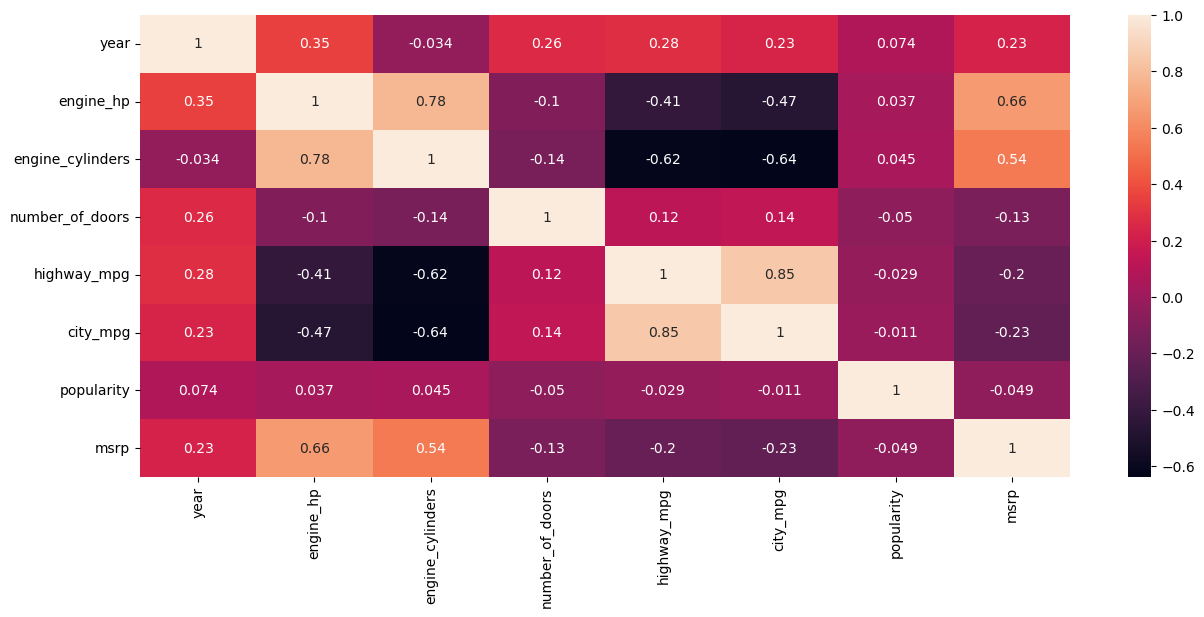

In [24]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

In [26]:
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,1.181200e+04
mean,2010.361581,249.504487,5.649424,3.432526,26.320945,19.328141,1553.679902,4.055994e+04
std,7.594647,109.206947,1.751646,0.882919,7.443589,6.527734,1440.067820,6.028413e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.099000e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.997000e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.220500e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


<Axes: xlabel='msrp', ylabel='Count'>

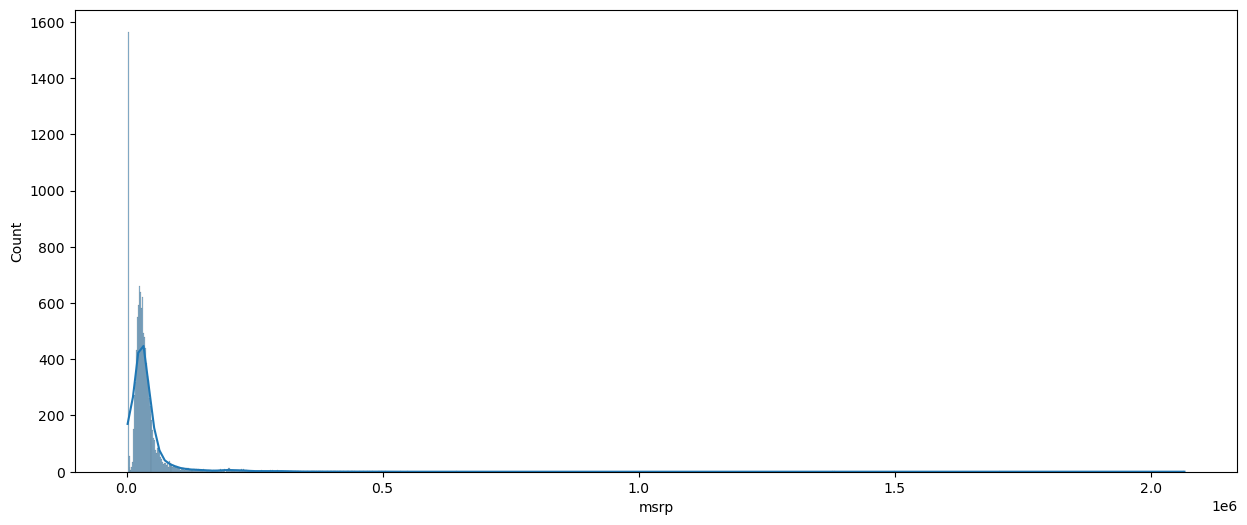

In [27]:
# handle outliers 
plt.figure(figsize=((15,6)))
sns.histplot(df["msrp"],kde=True)

In [28]:
# drop values after 1e6
df = df[df["msrp"]<1e6]

In [25]:
''' numerical features that are important 
    engine_hp and engine_cylinders both have high correlation with msrp and 
    the corr between  them  is 0.7  >> (<0.8) .. take them both 
'''
x=df[['year','engine_hp','engine_cylinders']]
y = df['msrp']

<Axes: xlabel='engine_hp', ylabel='msrp'>

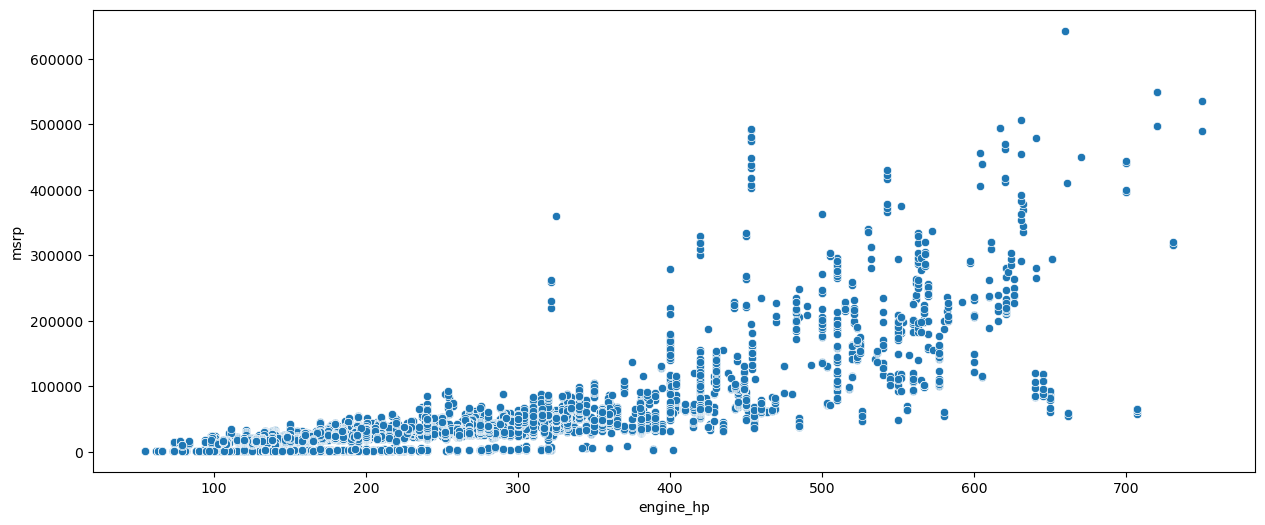

In [29]:
'''
show realatin between engine_hp and msrp 
'''
plt.figure(figsize=((15,6)))
sns.scatterplot(x = df["engine_hp"],y = df["msrp"])

In [30]:
# clip data after 7000
df["engine_hp"] = np.where(df["engine_hp"]>700, 700, df["engine_hp"])

<Axes: xlabel='engine_cylinders', ylabel='msrp'>

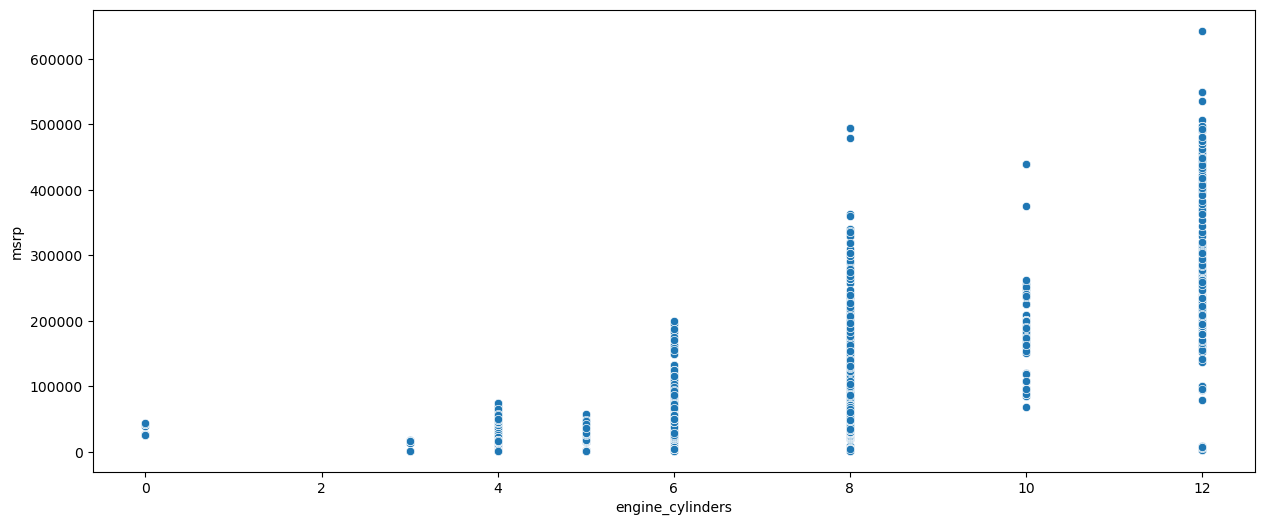

In [31]:
'''
show realatin between engine_cylinders and msrp 
'''
plt.figure(figsize=((15,6)))
sns.scatterplot(x = df["engine_cylinders"],y = df["msrp"])

<Axes: xlabel='engine_cylinders', ylabel='msrp'>

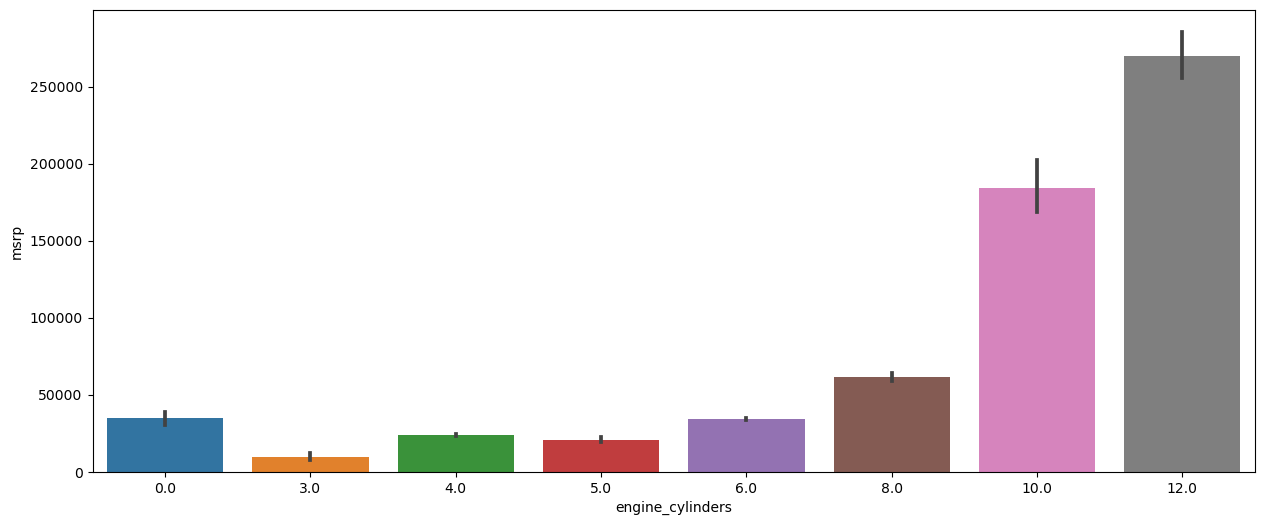

In [32]:
# note that engine_cylinders >> data descerte ... so it's better to use barplot
plt.figure(figsize=((15,6)))
sns.barplot(x = df["engine_cylinders"],y = df["msrp"])

In [33]:
# note that there are cars with (0 cylinders)  and this is impossible >> so we will drop it 
df = df[df["engine_cylinders"]!=0]

In [ ]:
# so we finished numerical data >> now we will handle categorical data .... watch and learn 


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11793 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11793 non-null  object 
 1   model              11793 non-null  object 
 2   year               11793 non-null  int64  
 3   engine_fuel_type   11793 non-null  object 
 4   engine_hp          11793 non-null  float64
 5   engine_cylinders   11793 non-null  float64
 6   transmission_type  11793 non-null  object 
 7   driven_wheels      11793 non-null  object 
 8   number_of_doors    11793 non-null  float64
 9   vehicle_size       11793 non-null  object 
 10  vehicle_style      11793 non-null  object 
 11  highway_mpg        11793 non-null  int64  
 12  city_mpg           11793 non-null  int64  
 13  popularity         11793 non-null  int64  
 14  msrp               11793 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


<Axes: xlabel='make', ylabel='msrp'>

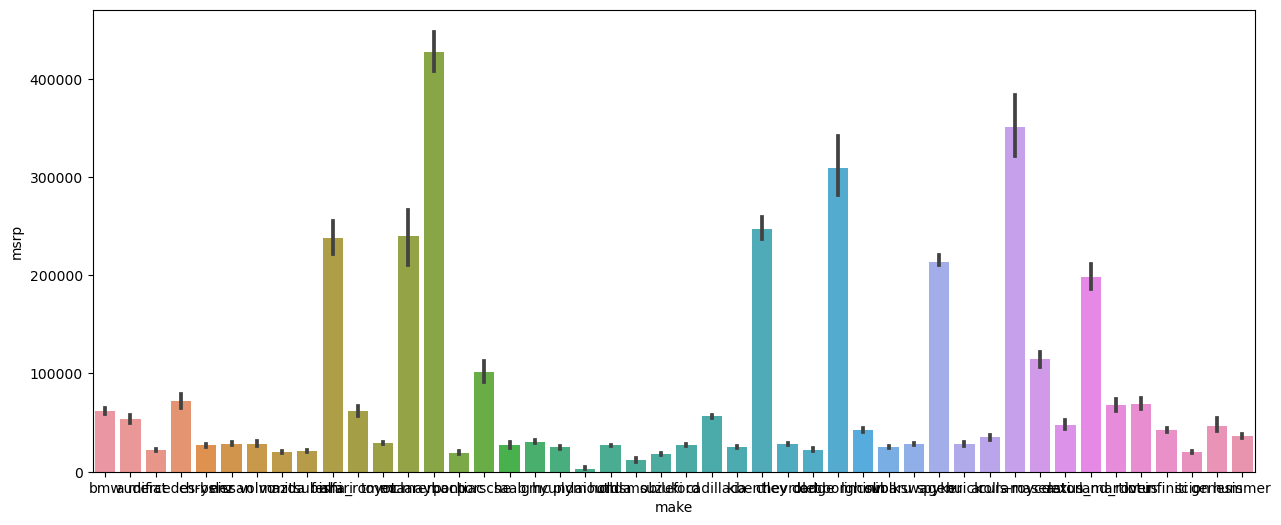

In [35]:
# show realatin between make and msrp 
plt.figure(figsize=((15,6)))
sns.barplot(x = df["make"],y = df["msrp"])

'''
     Note that there is high variation and not so much (unique values ) (46 )
'''

In [36]:
df["make"].nunique()

46

<Axes: xlabel='model', ylabel='msrp'>

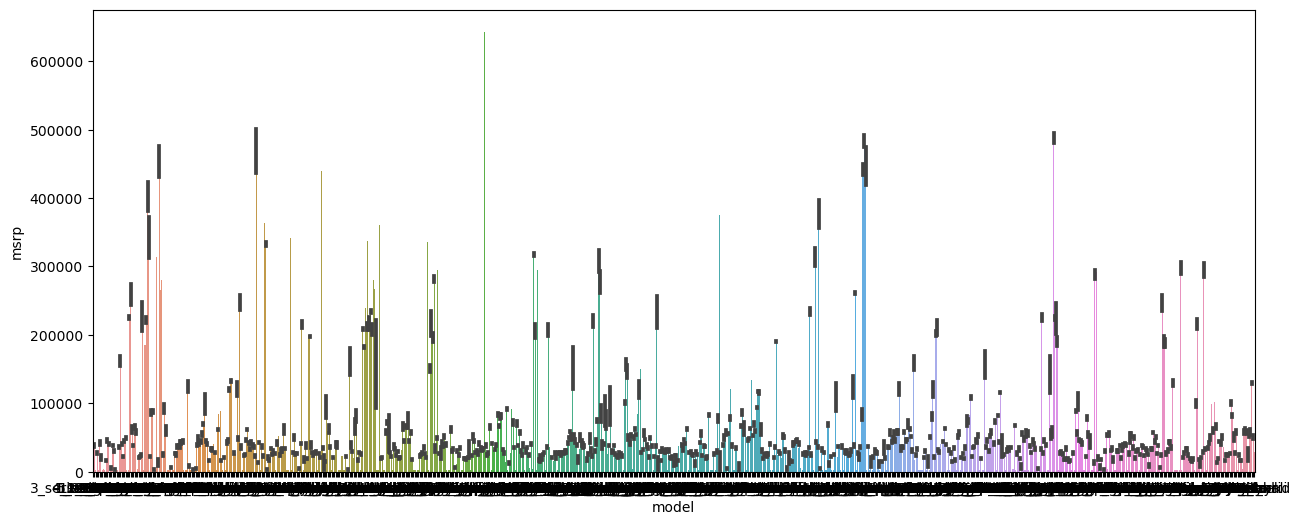

In [37]:
plt.figure(figsize=((15,6)))
sns.barplot(x = df["model"],y = df["msrp"])

In [ ]:
'''
     Note that there is high variation but so much (unique values ) (897) 
     so drop it 
'''

In [38]:
df ['model'].nunique()

897

In [52]:
df = df.drop("model",axis=1)

<Axes: xlabel='engine_fuel_type', ylabel='msrp'>

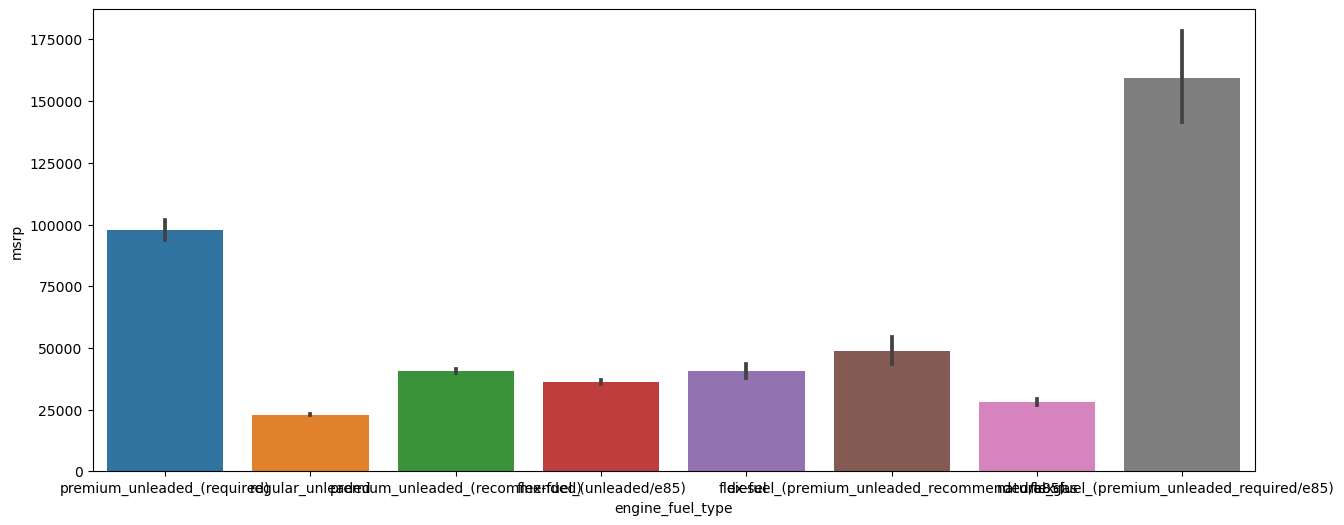

In [39]:
plt.figure(figsize=((15,6)))
sns.barplot(x = df["engine_fuel_type"],y = df["msrp"])

In [40]:
df['engine_fuel_type'].nunique()
#  small features ..take it 

8

<Axes: xlabel='transmission_type', ylabel='msrp'>

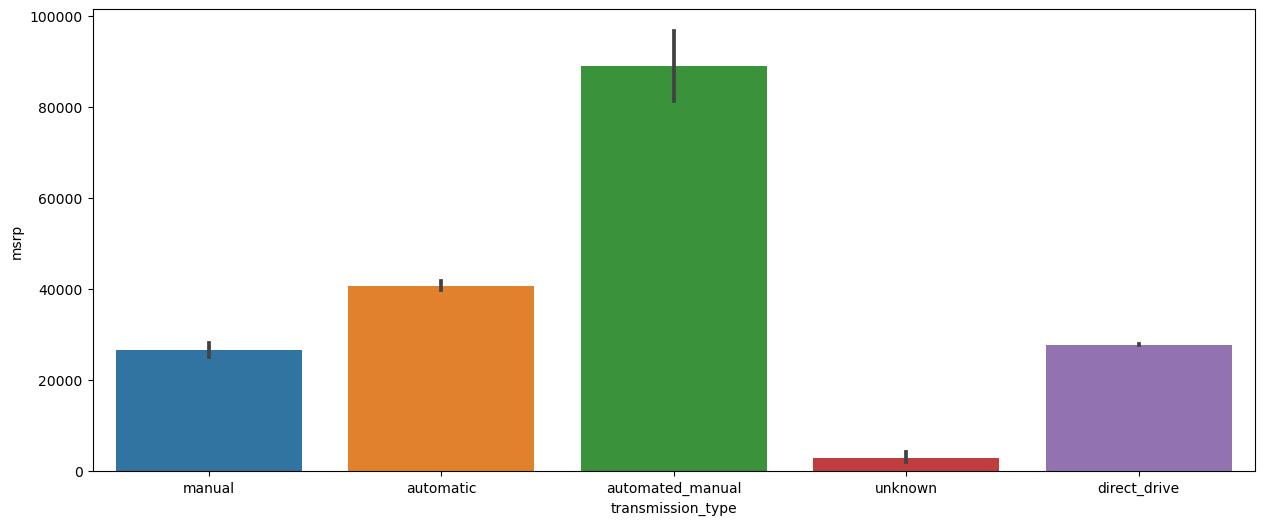

In [42]:
plt.figure(figsize=((15,6)))
sns.barplot(x = df["transmission_type"],y = df["msrp"])

In [44]:
df['transmission_type'].nunique()
# variation with only 5 features >> take it 

5

<Axes: xlabel='driven_wheels', ylabel='msrp'>

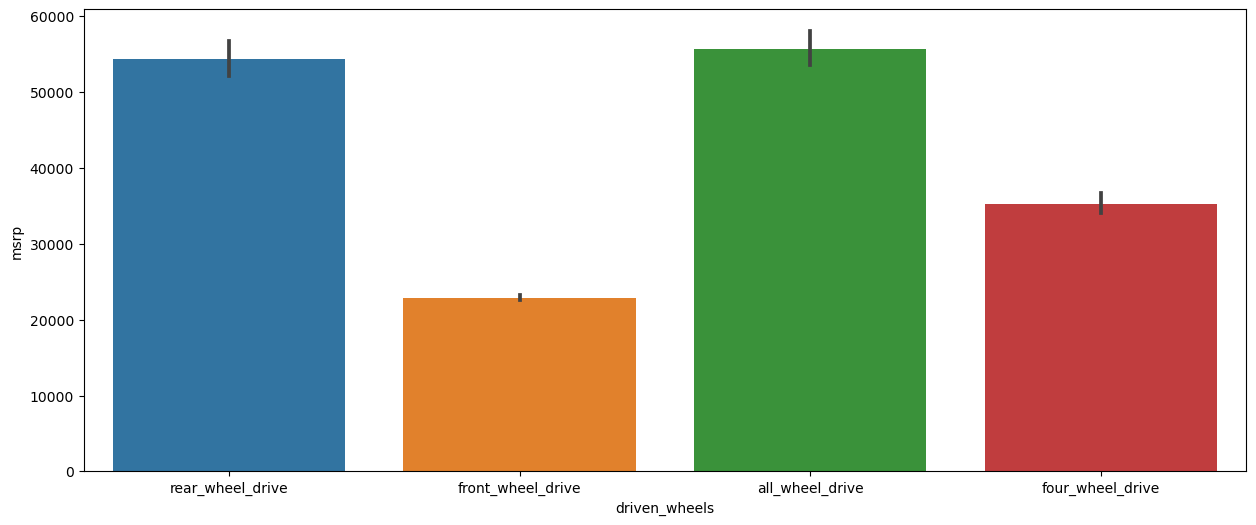

In [45]:
plt.figure(figsize=((15,6)))
sns.barplot(x = df["driven_wheels"],y = df["msrp"])

In [46]:
df['driven_wheels'].nunique()    # take it 

4

<Axes: xlabel='vehicle_size', ylabel='msrp'>

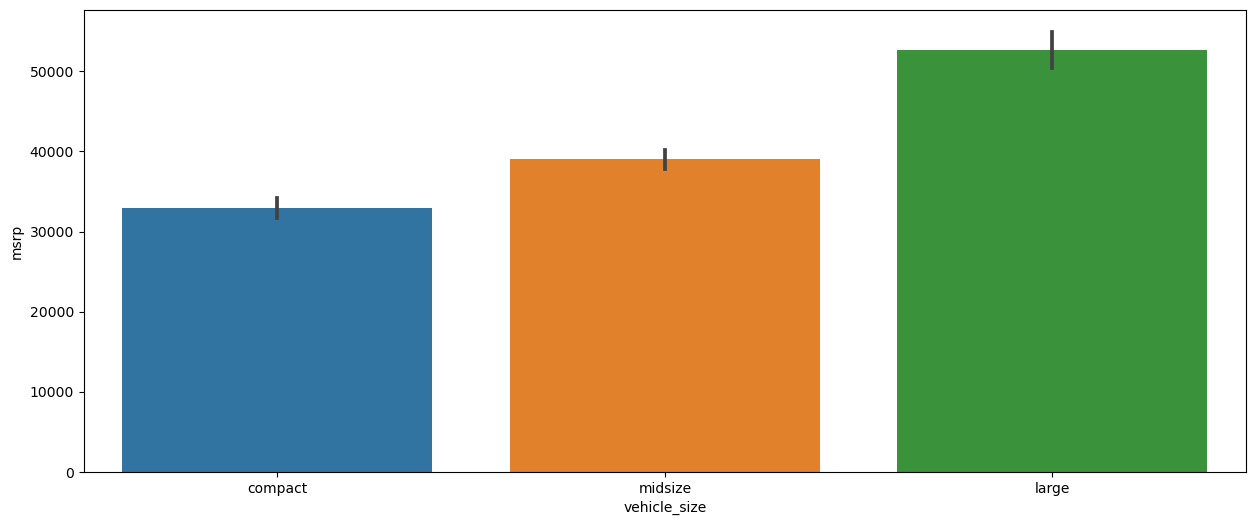

In [47]:
plt.figure(figsize=((15,6)))
sns.barplot(x = df["vehicle_size"],y = df["msrp"])

In [48]:
df['vehicle_size'].nunique()   # take it 

3

<Axes: xlabel='vehicle_style', ylabel='msrp'>

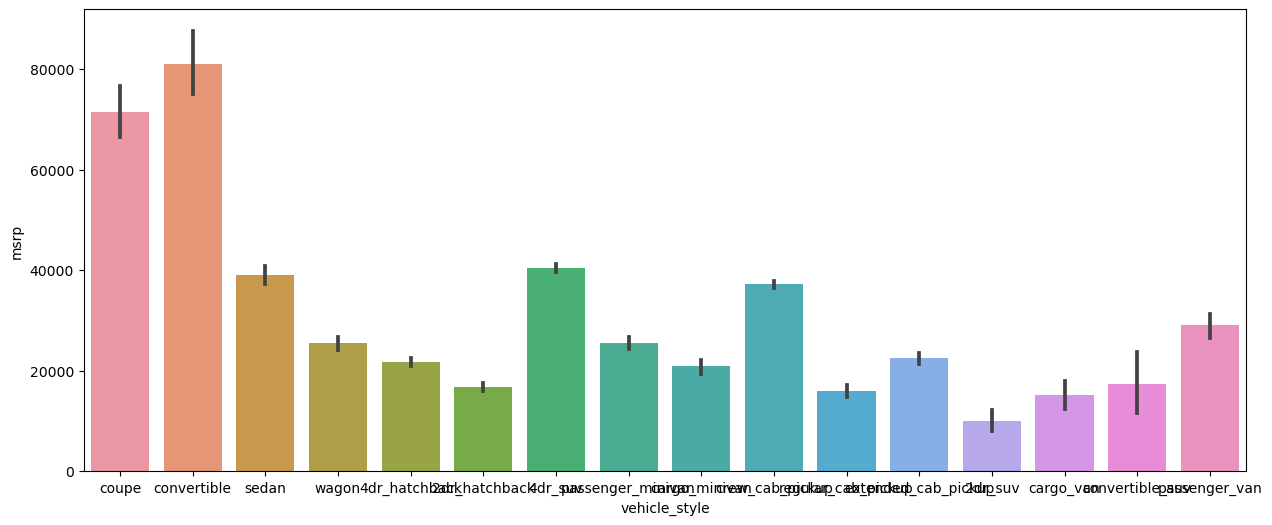

In [49]:
plt.figure(figsize=((15,6)))
sns.barplot(x = df["vehicle_style"],y = df["msrp"])        

In [50]:
df['vehicle_style'].nunique()          #  take it 

16

In [51]:
df = pd.get_dummies(df,columns=["make","vehicle_style","vehicle_size","driven_wheels","transmission_type","engine_fuel_type"])

In [53]:
x = df.drop("msrp",axis=1)
y = df["msrp"]
model = LinearRegression()
model.fit(x,y)
model.score(x,y)

0.8675738727348296